In [32]:
from IPython.display import Image

# 다음 단어 예측하기
# 'An adorable little boy is spreading _____'

<b> 기존 N-gram 언어 모델은 충분한 데이터를 관측하지 못하면 언어를 정확히 모델링하지 못하는 희소 문제가 있었음<br>
    분석할 시퀀스가 존재하지 않으면, 예측할 수 없기 때문에 이에 탄생한 언어 모델이 NNLM

In [2]:
# 케라스(Keras)로 RNN 구현

<p> RNN 층을 추가하는 코드<br>
    model.add(SimpleRNN(hidden_size)) # 가장 간단한 형태<br>
    
    model.add(SImpleRNN(hidden_size, input_shape=(timesteps, input_dim)) # 추가 인자를 사용할 때 
    
    model.add(SimpleRNN(hidden_size, input_length=M, input_dim=N)) # 다른 표기

In [4]:
from keras.models import Sequential
from keras.layers import SimpleRNN

In [5]:
model = Sequential()
model.add(SimpleRNN(3, input_shape=(2,10)))
model.summary()
# batch_size를 정의하지 않은 경우

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 3)                 42        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


In [7]:
model = Sequential()
model.add(SimpleRNN(3, batch_input_shape=(8,2,10)))
model.summary()
# batch_size 정의

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (8, 3)                    42        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


In [10]:
model = Sequential()
model.add(SimpleRNN(3, batch_input_shape=(8,2,10),return_sequences=True))
model.summary()
# return_sequences 매개 변수에 True를 기재하여 3D텐서 리턴

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_3 (SimpleRNN)     (8, 2, 3)                 42        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


In [13]:
# 파이썬으로 RNN 구현
# ht = tanh(WxXt + Whht-1+b)

#pseudocode

<p> hidden_state_t = 0 # 초기 은닉 상태를 0(벡터)로 초기화<br>
    for input_t in input_length: #각 시점마다 입력을 받음<br>
    output_t = tanh(input_t, hidden_state_t) # 각 시점에 대해 입력과 은닉 상태를 가지고 연산<br>
    hidden_state_t = output_t # 계산 결과는 현재 시점의 은닉상태가 됨

In [17]:
import numpy as np

timesteps = 10 # 시점의 수. NLP에서는 보통 문장의 길이가 된다.
input_dim = 4 # 입력의 차원. NLP에서는 보통 단어 벡터의 차원이 된다.
hidden_size = 8 # 은닉 상태의 크기. 메모리 셀의 용량

inputs = np.random.random((timesteps, input_dim)) # 입력에 해당되는 2D 텐서

hidden_state_t = np.zeros((hidden_size,))
# 초기 은닉 상태는 0(벡터)로 초기화, 은닉 상태의 크기 hidden_size로 은닉 상태를 만듦.

print(hidden_state_t) # 8의 크기를 가지는 은닉 상태. 현재는 초기 은닉 상태로 모든 차원이 0의 값을 가짐

[0. 0. 0. 0. 0. 0. 0. 0.]


In [18]:
Wx = np.random.random((hidden_size, input_dim)) # (8, 4)r크기의 2D 텐서 생성. 입력에 대한 가중치
Wh = np.random.random((hidden_size, hidden_size)) # (8, 8) 크기의 2D 텐서 생성. 은닉 상태에 대한 가중치

b = np.random.random((hidden_size,)) # (8,)크기의 1D 텐서 생성. 이 값은 편향(bias)

In [21]:
print(np.shape(Wx))
print(np.shape(Wh))
print(np.shape(b))

# Wx : 은닉 상태의 크기 x 입력의 차원
# Wh : 은닉 상태의 크기 x 은닉 상태의 크기
# b : 은닉 상태의 크기

(8, 4)
(8, 8)
(8,)


In [23]:
# RNN 층 동작
total_hidden_states = []

# 메모리 셀 동작
for input_t in inputs:
    output_t = np.tanh(np.dot(Wx,input_t) + np.dot(Wh, hidden_state_t) + b) # Wx * Xt * Wh * Ht-1 + b(bias)
    total_hidden_states.append(list(output_t)) # 각 시점의 은닉 상태의 값을 계속해서 축적
    
    print(np.shape(total_hidden_states)) # 각 시점 t별 메모리 셀의 출력의 크기는 (timestep, output_dim)
    hidden_state_t = output_t
    
total_hidden_states = np.stack(total_hidden_states, axis=0)
# 출력 시 값을 깔끔하게 해준다.

print(total_hidden_states) # (timesteps, output_dim)의 크기. 이 경우 (10,8)의 크기를 가지는 메모리 셀의 2D 텐서를 출력.

(1, 8)
(2, 8)
(3, 8)
(4, 8)
(5, 8)
(6, 8)
(7, 8)
(8, 8)
(9, 8)
(10, 8)
[[0.86772623 0.89073442 0.62638878 0.90996251 0.96125759 0.88088186
  0.90893252 0.74319697]
 [0.9997119  0.99980275 0.99954901 0.99989351 0.99978664 0.99991183
  0.99700807 0.99991043]
 [0.9999499  0.99998244 0.99992336 0.99998838 0.99998846 0.99999621
  0.99967826 0.99998917]
 [0.99998403 0.99998681 0.99993693 0.99999508 0.99996953 0.99999719
  0.9992502  0.99999466]
 [0.99983225 0.9999381  0.99989913 0.99997355 0.9999785  0.99999401
  0.99953588 0.99997723]
 [0.9999033  0.99995948 0.99992493 0.99998217 0.99997557 0.99999091
  0.99968088 0.9999868 ]
 [0.99994061 0.99997512 0.99995005 0.99999    0.99998094 0.99999288
  0.99983344 0.99999175]
 [0.99999422 0.99999566 0.99995719 0.99999798 0.99998525 0.99999871
  0.99958912 0.99999723]
 [0.99990933 0.99994146 0.99988786 0.99997293 0.99993497 0.99997653
  0.99901491 0.99998618]
 [0.99993758 0.99996091 0.99991771 0.99998644 0.99996239 0.99999378
  0.99932608 0.99998839]

In [24]:
# 깊은 순환 신경망(Deep recurrent Neural Network)
# 은닉층이 2개인 깊은(deep) 순환 신경망

In [26]:
model = Sequential()
model.add(SimpleRNN(hidden_size, return_sequences=True))
model.add(SimpleRNN(hidden_size, return_sequences=True))
# 첫번째 은닉층은 다음 은닉층이 존재하므로, return_sequences=True 를 설정하여 모든 시점에 대해서 은닉 상태 값을 다음 은닉층으로 보냄

In [27]:
# 양방향 순황 신경망(Bidirectional Recurrent Neural Network)
# 시점 t에서의 출력값을 예측할 때, 이전 시점의 데이터뿐만 아니라 이후 데이터로도 예측
# Ex) Exercise is vert effective at [          ] belly fat.
# 1) reducing
# 2) increasing
# 3) multiplying

# 이전에 나온 단어들로만은 정답을 찾기 부족함, 목적어인 (belly fat)를 모르는 상태
# R즉, RNN이 과거 시점(time step)의 데이터들을 참고해서, 찾고자하는 정답을 예측하지만
# 실제 문제에서는 과거 시점의 데이터만 고려하는 것이 아닌, 향후 시점의 데이터에 힌트가 있는 경우도 많음
# 그래서 고안된 것이 양방향 RNN

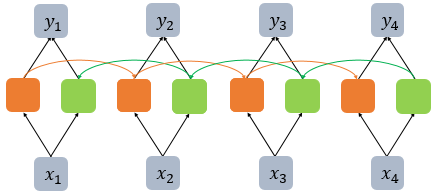

In [34]:
Image('rnn_image5_ver2.png')

In [38]:
# 첫 번째 메모리 셀 : 앞 시전의 은닉 상태를 전달받아 현재 은닉상태 계산
# 두 번쨰 메모리 셀 : 뒤 시점의 은닉 상태를 전달받아 현재 은닉상태 계산

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Bidirectional

model = Sequential()
model.add(Bidirectional(SimpleRNN(hidden_size, return_sequences = True), input_shape=(timesteps, input_dim)))

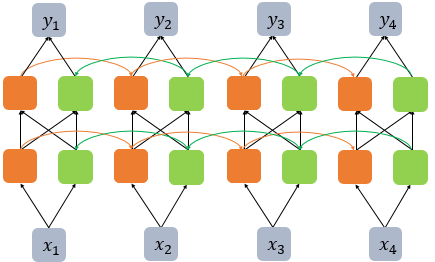

In [40]:
Image('rnn_image6_ver3.png')
# 양방향 RNN도 다수의 은닉층을 가질 수 있음

In [41]:
# 은닉층이 4개인 경우
model = Sequential()
model.add(Bidirectional(SimpleRNN(hidden_size, return_sequences=True), input_shape=(timesteps, input_dim)))
model.add(Bidirectional(SimpleRNN(hidden_size, return_sequences=True)))
model.add(Bidirectional(SimpleRNN(hidden_size, return_sequences=True)))
model.add(Bidirectional(SimpleRNN(hidden_size, return_sequences=True)))